we will be using the MNIST dataset, which is a set of 70,000 small
images of digits handwritten by high school students and employees of the US Cen‐
sus Bureau. Each image is labeled with the digit it represents.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
train_d = pd.read_csv("mnist_train.csv")
test_d = pd.read_csv("mnist_test.csv")
train_d.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X_train = train_d.drop('label', axis=1)
y_train = train_d['label']
print(X_train.head)
print(y_train.head)
X_train.shape

<bound method NDFrame.head of        1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
0        0    0    0    0    0    0    0    0    0     0  ...      0      0   
1        0    0    0    0    0    0    0    0    0     0  ...      0      0   
2        0    0    0    0    0    0    0    0    0     0  ...      0      0   
3        0    0    0    0    0    0    0    0    0     0  ...      0      0   
4        0    0    0    0    0    0    0    0    0     0  ...      0      0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
59995    0    0    0    0    0    0    0    0    0     0  ...      0      0   
59996    0    0    0    0    0    0    0    0    0     0  ...      0      0   
59997    0    0    0    0    0    0    0    0    0     0  ...      0      0   
59998    0    0    0    0    0    0    0    0    0     0  ...      0      0   
59999    0    0    0    0    0    0    0    0    0     0  ...      0      0   

       28x21  28x22  

(60000, 784)

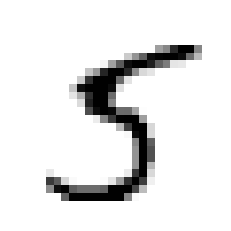

In [4]:
any_digit = X_train.iloc[59997,:].values
any_digit_image = any_digit.reshape( 28, 28)
plt.imshow(any_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis('off')
plt.show()

In [5]:
y_train_5 = (y_train == 5)         # True for all 5s, False for all other digits.
y_train_5

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: label, Length: 60000, dtype: bool

In [6]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(random_state=6)
sgd_classifier.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=6, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [7]:
sgd_classifier.predict([any_digit])

array([ True])

In [8]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3)

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53316,  1263],
       [  980,  4441]], dtype=int64)

In [10]:
from sklearn.metrics import precision_score, recall_score
print('precision score:   ', precision_score(y_train_5, y_train_pred)) 
print('Recall Score:  ', recall_score(y_train_5, y_train_pred))

precision score:    0.7785764375876578
Recall Score:   0.8192215458402509


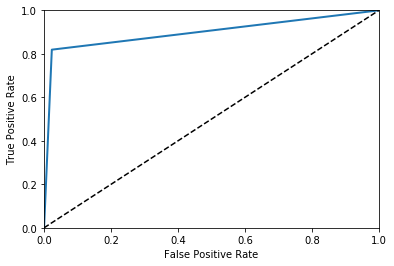

In [11]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_train_pred)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

One way to compare classifiers is to measure the area under the curve (AUC). A per‐
fect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will
have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute the ROC
AUC:

In [12]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_train_pred)

0.8980403887064169

In [13]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [14]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


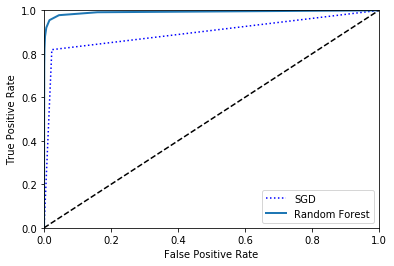

In [15]:
plt.plot(fpr, tpr, "b:", label="SGD")

plt.plot(fpr_forest, tpr_forest, linewidth=2, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc="bottom right")
plt.show()

In [16]:
roc_auc_score(y_train_5, y_scores_forest)

0.9920527492698306

Above we have seen how SGD calssifer works for a single value, but here we have to calssifie 10 digits. For classify the digit images into 10
classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a
1-detector, a 2-detector, and so on). Then when you want to classify an image, you get
the decision score from each classifier for that image and you select the class whose
classifier outputs the highest score. This is called the one-versus-all (OvA) strategy
(also called one-versus-the-rest).

In [18]:
sgd_classifier.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=6, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

To see that this is indeed the case, you can call the decision_function() method.
Instead of returning just one score per instance, it now returns 10 scores, one per
class:
The highest score is indeed the one corresponding to class 5:

In [19]:
some_digit_scores = sgd_classifier.decision_function([any_digit])
print(some_digit_scores)

[[-17880.95238934 -11961.63969325 -13712.27651475  -8229.45758138
  -10160.40327433   5232.05872129 -32860.80487364 -15914.84532264
     799.30591857 -11449.7031531 ]]


In [21]:
forest_clf.fit(X_train, y_train)
print(forest_clf.predict([any_digit]))
print(forest_clf.predict_proba([any_digit]))

[5]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [22]:
X_test = test_d.drop('label', axis=1)
y_test = test_d['label']

In [24]:
#Random Forest classifier Prediction

RFC_pred = forest_clf.predict(X_test)

print(confusion_matrix(y_test, RFC_pred))

#Checking the accuracy
from sklearn.metrics import f1_score
print(f1_score(y_test, RFC_pred, average='weighted')) 

from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(y_test, RFC_pred))

[[ 967    0    2    2    0    3    2    0    3    1]
 [   1 1119    2    4    0    2    3    0    4    0]
 [   8    2  985    9    5    1    5    7   10    0]
 [   3    0   23  946    0   12    1   10   13    2]
 [   1    2    4    4  935    1    3    2    5   25]
 [  13    1    3   28    4  826    4    0    9    4]
 [  11    5    2    0    8    7  919    0    6    0]
 [   2    7   23    8    4    1    1  968    2   12]
 [   7    1   13   20    9    6    8    4  899    7]
 [   7    3    6   11   28    5    2   11    8  928]]
0.9491596632017497
0.9492


E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [25]:
#SGD Classifier Predicton

SGD_pred = sgd_classifier.predict(X_test)

print(confusion_matrix(y_test, SGD_pred))

#Checking the accuracy
from sklearn.metrics import f1_score
print(f1_score(y_test, SGD_pred, average='weighted')) 

from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(y_test, SGD_pred))

[[ 953    0    3    4    1    5    1    3    8    2]
 [   0 1104   11    4    0    2    3    1    8    2]
 [   5    2  948   19    8    7    3   12   24    4]
 [   5    1   30  845    0   78    3   11   30    7]
 [   0    1    7   14  890    0    3    5   13   49]
 [   8    1    4   24    7  787   12    6   33   10]
 [  13    3   23    3   12   46  834    1   20    3]
 [   5    3   22   13    4    3    1  950    5   22]
 [   7    8   17   29   10   61    3   16  791   32]
 [   7    2    3   17   21   11    0   57   21  870]]
0.8974332828305549
0.8972


E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


#AS we see from above results that Random Forest better than SGD classifer. 
#And also learning rate of Random Forest is much less than SGD. As SGD runs 10 times, each time for single number while 
#Random forest classifies in single run.

In [ ]:
final = forest_clf.predict